In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

df_combined = X.copy()
df_combined['Cover_Type'] = y['Cover_Type']

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)

# Check in week 5/6

In [ ]:
mask = (X["Wilderness_Area1"] == 1) | (X["Wilderness_Area3"] == 1)
subset = X[mask]
subset = subset[["Elevation", "Aspect", "Slope",
                  "Horizontal_Distance_To_Hydrology",	"Vertical_Distance_To_Hydrology",
                  "Horizontal_Distance_To_Roadways",	"Hillshade_9am", "Hillshade_Noon",
                  "Hillshade_3pm",	"Horizontal_Distance_To_Fire_Points",
                  "Wilderness_Area1"]]
display(subset.head())

print(subset.shape)

In [ ]:
subset.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1
0,2596,51,3,258,0,510,221,232,148,6279,1
1,2590,56,2,212,-6,390,220,235,151,6225,1
2,2804,139,9,268,65,3180,234,238,135,6121,1
3,2785,155,18,242,118,3090,238,238,122,6211,1
4,2595,45,2,153,-1,391,220,234,150,6172,1


In [ ]:
# prepare Random Forest predictors and response
X_rf = subset[["Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Fire_Points", "Horizontal_Distance_To_Roadways"]]
y_rf = subset[["Wilderness_Area1"]]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.2)

In [ ]:
# Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predictions
y_probs_train = model.predict_proba(X_train)[:, 1]
y_preds_train = (y_probs_train >= 0.5).astype(int)

y_probs_test = model.predict_proba(X_test)[:, 1]
y_preds_test = (y_probs_test >= 0.5).astype(int)

# calculate accuracy
train_acc = accuracy_score(y_train, y_preds_train)
print("Training Accuracy:", train_acc)

test_acc = accuracy_score(y_test, y_preds_test)
print("Testing Accuracy:", test_acc)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy: 0.9998103703127431
Testing Accuracy: 0.8096506923914735


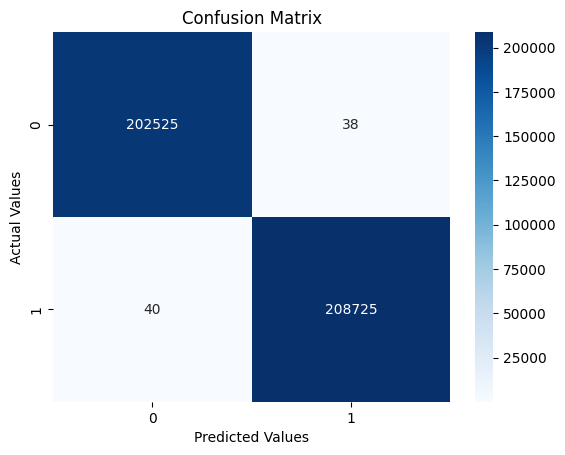

Prediction Accuracy: 0.9998103703127431
Prediction Error: 0.000189629687256887
True Positive Rate: 0.9998083970014131
F1 Score: 0.9998131861815256


In [ ]:
# confusion matrix, prediction accuracy, prediction error, true positive rate, true negative rate, F1 score of training set

# confusion matrix
cm = confusion_matrix(y_train, y_preds_train)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

# prediction accuracy
acc = accuracy_score(y_train, y_preds_train)
print("Prediction Accuracy:", acc)

# prediction error
error = 1 - acc
print("Prediction Error:", error)

# true positive rate
tpr = cm[1, 1] / (cm[1, 1] + cm[1, 0])
print("True Positive Rate:", tpr)

# F1 score
f1 = f1_score(y_train, y_preds_train)
print("F1 Score:", f1)

The model has good diagnostics. The confusion matrix shows that there are very few errors, and the accuracy, true positive rate, and F1 score are all very high (close to 1).

AUC: 0.9004479326503931


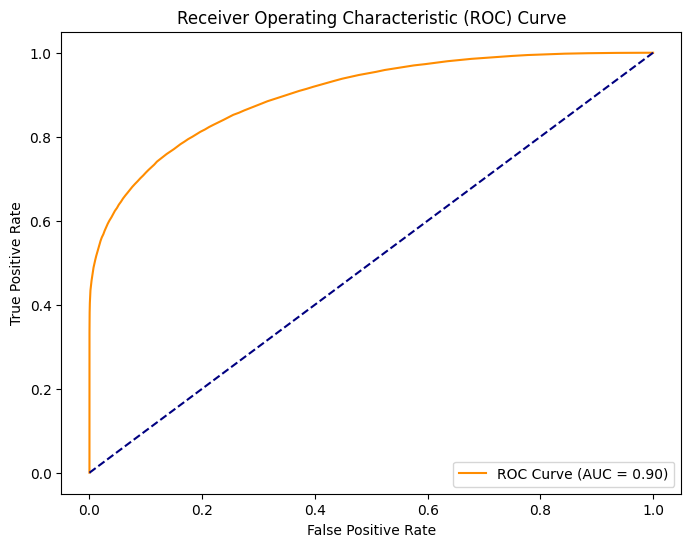

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_test)
roc_auc = roc_auc_score(y_test, y_probs_test)

print("AUC:", roc_auc)

# plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


explanation

our roc curve does have a high accuracy alongside with our confusion matrix but that is mainly because the tree dataset itself is designed to be overfitted. The testing accuracy and the cross-validation results do end up being around 0.80 which is much more accurate for our random forest model on unseen data because our feature selection using vertical distance to hydrology, and horizontal distance to fires/roadways. We still have a 0.80 testing accuracy though which means our model performs well for new test data.

In [ ]:
# 5-fold cross-validation on the test set
cv_results = cross_validate(model, X_test, y_test, cv=5,
                            scoring=['accuracy', 'roc_auc'])

print("Cross-validation results (Accuracy):", cv_results['test_accuracy'])
print("Cross-validation results (AUC):", cv_results['test_roc_auc'])

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Cross-validation results (Accuracy): [0.79160792 0.79997083 0.7965088  0.7940776  0.79704366]
Cross-validation results (AUC): [0.88179835 0.8840094  0.88280242 0.8808761  0.88439966]
